# Receita e Assinantes da Netflix

## Dados

O conjunto de dados *Netflix OTT Revenue and Number of Paid Subscribers* apresenta informações detalhadas sobre a receita da Netflix em dólares e o número de assinantes pagos, organizados por região e data. As principais colunas incluem:

* **Data:** a data em que os dados foram registrados.
* **Receita:** a receita total da Netflix em dólares para o período especificado.
* **Assinantes por Região:** o número de assinantes pagos categorizados por região geográfica.
* **Região:** a área geográfica específica coberta pelo conjunto de dados, como América do Norte, Europa, Ásia, etc.



---------------------------



> A base de dados foi extraida do *Kaggle* e pode ser encontrada neste [link](https://www.kaggle.com/datasets/mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file/data). A ideia é prever a região (*UCAN*, *EMEA*, *LATM* ou *APAC*) baseado em suas características geográficas.

## Preparando o ambiente

In [1738]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import graphviz

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [1739]:
# extraindo o arquivo em Datafrmae através do Pandas
data = pd.read_csv('netflix_revenue_updated.csv', sep=',')
data.head(20)

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,31-03-2019,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,30-06-2019,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,30-09-2019,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,31-12-2019,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,31-03-2020,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000
5,30-06-2020,6148286000,2839670000,1892537000,785368000,569140000,72904000,61483000,36068000,22492000,13.25,10.50,7.44,8.96,192947000
6,30-09-2020,6435637000,2933445000,2019083000,789384000,634891000,73081000,62242000,36324000,23504000,13.40,10.88,7.27,9.20,195151000
7,31-12-2020,6644442000,2979505000,2137158000,788522000,684609000,73936000,66698000,37537000,25492000,13.51,11.05,7.12,9.32,203663000
8,31-03-2021,7163282000,3170972000,2343674000,836647000,762414000,74384000,68508000,37894000,26853000,14.25,11.56,7.39,9.71,207639000
9,30-06-2021,7341777000,3234643000,2400480000,860882000,799480000,73951000,68696000,38658000,27875000,14.54,11.66,7.50,9.74,209180000


### **Análise exploratória dos dados**

In [1740]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            21 non-null     object 
 1   Global Revenue                  21 non-null     int64  
 2   UCAN Streaming Revenue          21 non-null     int64  
 3   EMEA Streaming Revenue          21 non-null     int64  
 4   LATM Streaming Revenue          21 non-null     int64  
 5   APAC Streaming Revenue          21 non-null     int64  
 6   UCAN Members                    21 non-null     int64  
 7   EMEA  Members                   21 non-null     int64  
 8   LATM Members                    21 non-null     int64  
 9   APAC Members                    21 non-null     int64  
 10  UCAN ARPU                       21 non-null     float64
 11  EMEA ARPU                       21 non-null     float64
 12  LATM  ARPU                      21 non

In [1741]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global Revenue,21.0,7.121887e+09,1.351591e+09,4.520992e+09,6.148286e+09,7.483467e+09,7.970141e+09,9.370440e+09
UCAN Streaming Revenue,21.0,3.205985e+09,4.887111e+08,2.256851e+09,2.839670e+09,3.257697e+09,3.594791e+09,4.224315e+09
EMEA Streaming Revenue,21.0,2.203562e+09,4.965438e+08,1.233379e+09,1.892537e+09,2.375814e+09,2.523426e+09,2.958153e+09
LATM Streaming Revenue,21.0,9.147895e+08,1.637769e+08,6.304720e+08,7.885220e+08,9.152970e+08,1.030234e+09,1.165008e+09
APAC Streaming Revenue,21.0,7.364426e+08,2.277381e+08,3.196020e+08,5.691400e+08,8.340020e+08,9.167540e+08,1.022924e+09
UCAN Members,21.0,7.338071e+07,4.107604e+06,6.650100e+07,7.290400e+07,7.395100e+07,7.457900e+07,8.265800e+07
EMEA Members,21.0,6.834500e+07,1.368005e+07,4.254200e+07,6.148300e+07,7.050000e+07,7.672900e+07,9.172900e+07
LATM Members,21.0,3.799657e+07,5.468794e+06,2.754700e+07,3.606800e+07,3.898800e+07,4.124900e+07,4.772000e+07
APAC Members,21.0,2.964705e+07,1.076555e+07,1.214100e+07,2.249200e+07,3.005100e+07,3.802300e+07,4.749500e+07
UCAN ARPU,21.0,1.464952e+01,1.609042e+00,1.145000e+01,1.325000e+01,1.468000e+01,1.618000e+01,1.730000e+01


In [1742]:
data.tail()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
16,31-03-2023,8161503000,3608645000,2517641000,1070192000,933523000,74398000,77373000,41249000,39478000,16.18,10.89,8.60,8.03,232498000
17,30-06-2023,8187301000,3599448000,2562170000,1077435000,919273000,75571000,79807000,42466000,40546000,16.00,10.87,8.58,7.66,238390000
18,30-09-2023,8541668000,3735133000,2693146000,1142811000,948216000,77321000,83760000,43645000,42427000,16.29,10.98,8.85,7.62,247153000
19,31-12-2023,8832825000,3594791000,2783530000,1156023000,962715000,80128000,88813000,45997000,45338000,16.64,10.75,8.60,7.31,260276000
20,31-03-2024,9370440000,4224315000,2958153000,1165008000,1022924000,82658000,91729000,47720000,47495000,17.30,10.92,8.29,7.35,269602000


In [1743]:
data.shape

(21, 15)

In [1744]:
data.isnull().sum()

Date                              0
Global Revenue                    0
UCAN Streaming Revenue            0
EMEA Streaming Revenue            0
LATM Streaming Revenue            0
APAC Streaming Revenue            0
UCAN Members                      0
EMEA  Members                     0
LATM Members                      0
APAC Members                      0
UCAN ARPU                         0
EMEA ARPU                         0
LATM  ARPU                        0
APAC  ARPU                        0
Netflix Streaming Memberships     0
dtype: int64

### **Manipulação**

Pode-se observar que algumas colunas apresentam espaços desnecessários e isso pode atrapalhar a análise, então vamos renomeá-las.

In [1745]:
# removendo espaços extras nos nomes das colunas
data.columns = ['Date', 'Global Revenue', 'UCAN Streaming Revenue',
              'EMEA Streaming Revenue', 'LATM Streaming Revenue',
              'APAC Streaming Revenue', 'UCAN Members', 'EMEA Members',
              'LATM Members', 'APAC Members', 'UCAN ARPU', 'EMEA ARPU',
              'LATM ARPU', 'APAC ARPU', 'Netflix Streaming Memberships']

In [1746]:
data.columns

Index(['Date', 'Global Revenue', 'UCAN Streaming Revenue',
       'EMEA Streaming Revenue', 'LATM Streaming Revenue',
       'APAC Streaming Revenue', 'UCAN Members', 'EMEA Members',
       'LATM Members', 'APAC Members', 'UCAN ARPU', 'EMEA ARPU', 'LATM ARPU',
       'APAC ARPU', 'Netflix Streaming Memberships'],
      dtype='object')

Para a análise que irei aplicar, é necessário ter uma única coluna com os nomes de todas as regiões da base de dados. Com isso, aplicarei uma função onde cada linha será associada a uma região específica com base nas colunas de receita de streaming fornecidas.

In [1747]:
def extrair_nome_regiao(coluna):
  return coluna.split()[0]

# lista de colunas de streaming de receita
colunas_receita_streaming = ['UCAN Streaming Revenue', 'EMEA Streaming Revenue', 'LATM Streaming Revenue', 'APAC Streaming Revenue']

# extrai os nomes das regiões das colunas de receita de streaming
nomes_regioes = [extrair_nome_regiao(col) for col in colunas_receita_streaming]

# cria a coluna 'Região' no DataFrame, repetindo cada valor o número de vezes necessário
num_linhas = len(data)
num_regioes = len(nomes_regioes)
repeticoes_por_regiao = num_linhas // num_regioes + 1
nomes_regioes_repetidos = [nome for nome in nomes_regioes for _ in range(repeticoes_por_regiao)]
data['Região'] = nomes_regioes_repetidos[:num_linhas]

data.head()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships,Região
0,31-03-2019,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000,UCAN
1,30-06-2019,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000,UCAN
2,30-09-2019,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000,UCAN
3,31-12-2019,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000,UCAN
4,31-03-2020,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000,UCAN


In [1748]:
# garantindo que a coluna "Date" esteja no formato dia-mês-ano para melhor análise
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y').copy()

### **Visualização**

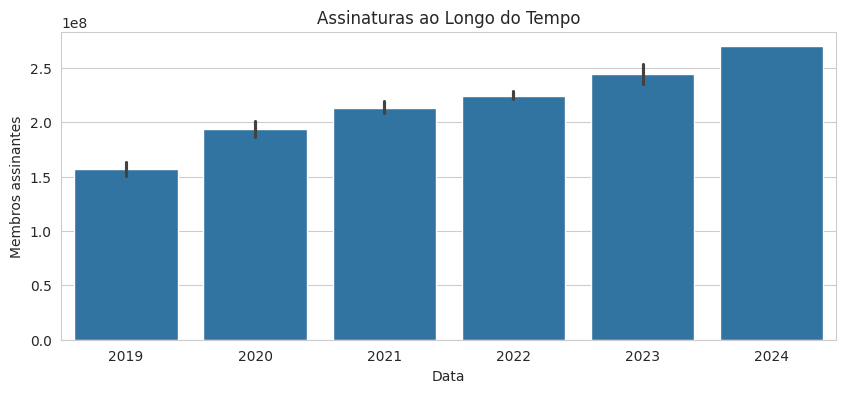

In [1749]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=data, x=data['Date'].dt.year, y='Netflix Streaming Memberships')
  grafico.set(title='Assinaturas ao Longo do Tempo', xlabel='Data', ylabel='Membros assinantes')
  grafico.figure.set_size_inches(10, 4)

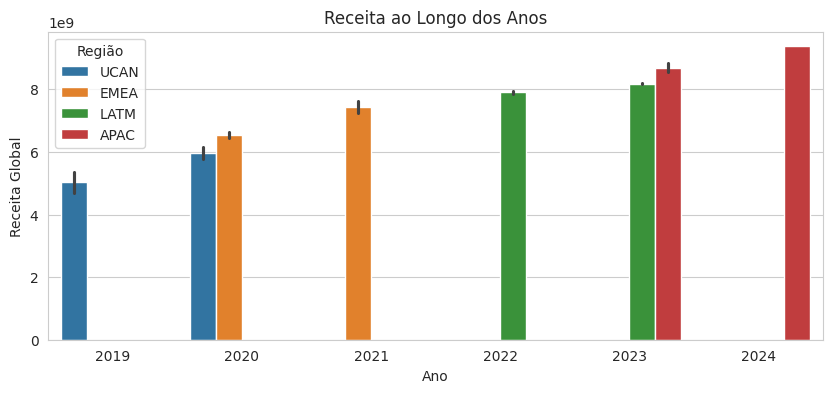

In [1750]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=data, x=data['Date'].dt.year, y='Global Revenue', hue='Região')
  grafico.set(title='Receita ao Longo dos Anos', xlabel='Ano', ylabel='Receita Global')
  grafico.figure.set_size_inches(10, 4)
  grafico.legend(title='Região')

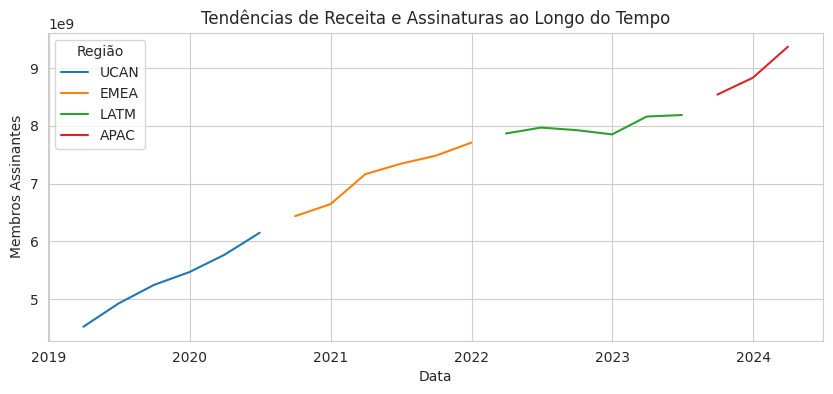

In [1751]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=data,  x='Date', y='Global Revenue', hue='Região')
  grafico.set(title='Tendências de Receita e Assinaturas ao Longo do Tempo', xlabel='Data',ylabel='Membros Assinantes')
  grafico.figure.set_size_inches(10, 4)

* É evidente que ao longo do tempo o número de assinantes e a receita em geral aumentam ano após ano, indicando uma tendência de crescimento contínuo no mercado. Observa-se que a cada ano uma região específica se destaca, possivelmente devido a novidades e estratégias de marketing. Atualmente, a região da Ásia apresenta o maior número de assinantes e tendências.

Vamos verificar se há correlação entre as variáveis que julgamos ser as principais (*Global Revenue* e *Netflix Streaming Memberships*).

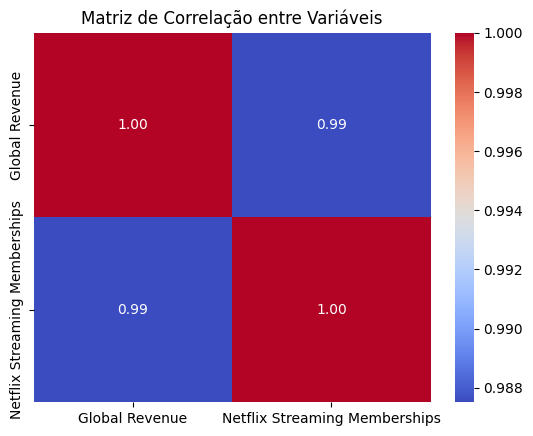

In [1752]:
correlation_matrix = data[['Global Revenue', 'Netflix Streaming Memberships']].corr()

# mapa de calor para visualizar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

Com base nas informações dos dados extraídos e na análise que irei realizar, não necessariamente preciso de todas as colunas. Portanto, vou criar outro dataframe apenas com as colunas que irei utilizar. Nelas há uma considerada correlação e acredito ser as melhores para o objetivo.

In [1753]:
# dataframe "df" somente com as colunas de interesse
df = ['Região','Global Revenue', 'Netflix Streaming Memberships']
df = data[df]
df.head()

,Região,Global Revenue,Netflix Streaming Memberships
0,UCAN,4520992000,148863000
1,UCAN,4923116000,151562000
2,UCAN,5244905000,158334000
3,UCAN,5467434000,167090000
4,UCAN,5767691000,182856000


## Modelo de classificação

In [1754]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    df.drop(['Região'], axis=1),
    df['Região'],
    test_size=0.5,
    random_state=15
)

**Variáveis preditoras**

In [1755]:
predictors_train.head()

,Global Revenue,Netflix Streaming Memberships
16,8161503000,232498000
1,4923116000,151562000
6,6435637000,195151000
18,8541668000,247153000
11,7709318000,221844000


In [1756]:
predictors_test.head()

,Global Revenue,Netflix Streaming Memberships
10,7483467000,213563000
13,7970141000,220672000
2,5244905000,158334000
19,8832825000,260276000
20,9370440000,269602000


In [1757]:
predictors_test.shape

(11, 2)

**Variável resposta**

In [1758]:
target_train.head()

16    LATM
1     UCAN
6     EMEA
18    APAC
11    EMEA
Name: Região, dtype: object

In [1759]:
target_test.head()

10    EMEA
13    LATM
2     UCAN
19    APAC
20    APAC
Name: Região, dtype: object

In [1760]:
target_test.shape

(11,)

### **Treino**

* **Arvore de Decisão.**

A árvore de decisão é um modelo de aprendizado de máquina supervisionado. O
modelo é chamado de "árvore" porque ele é estruturado em uma hierarquia de nodos (*nós*) e arestas (*ramos*), que se assemelha a uma árvore.

In [1761]:
# treino do modelo
model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)

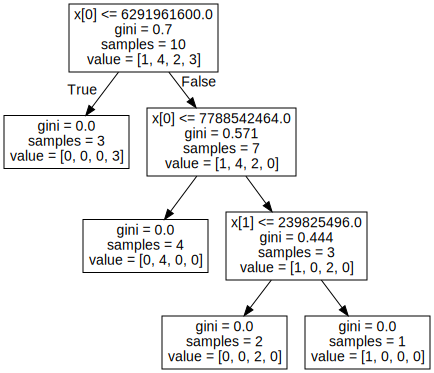

In [1762]:
# plot da árvore de decisão
tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

* **Visualizar a precisão do modelo.**

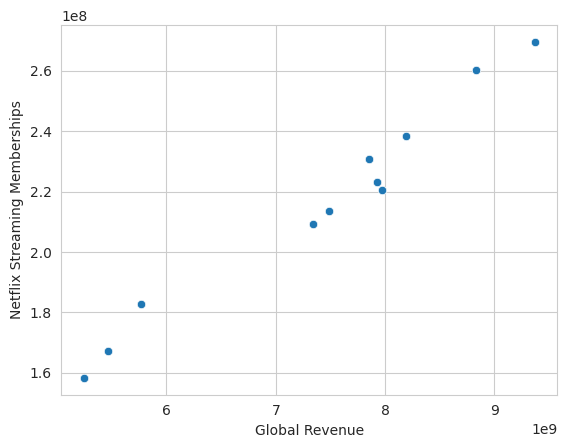

In [1763]:
with sns.axes_style('whitegrid'):
  grafico = sns.scatterplot(data=prediction, x='Global Revenue', y='Netflix Streaming Memberships')

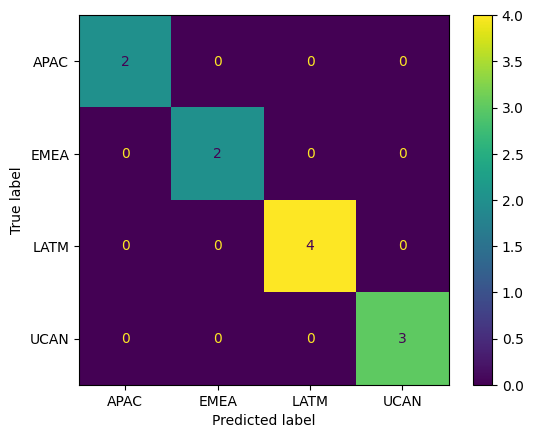

In [1764]:
# calcula a matriz de confusão
target_predicted = model.predict(predictors_test)
confusion_matrix = confusion_matrix(target_test, target_predicted)
ConfusionMatrixDisplay.from_estimator(model, predictors_test, target_test)
plt.show()

In [1765]:
acuracia = accuracy_score(target_test, target_predicted)
print(f"{round(100 * acuracia, 2)}%")

100.0%


## Predição

Com o modelo treinado e avaliado, podemos utilizá-lo para criar um exemplo pré-processado e utilizar o modelo para realizar a predição.

> **Exemplo**: Global Revenue de 9370440000 e Netflix Streaming Memberships de 269602000.

In [1766]:
# Criar o vetor de previsão com a data convertida e outras características
predição = np.array([9370440000, 269602000])
predição = model.predict(predição.reshape(1, -1))
print(f'Região:{predição}')

Região:['APAC']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Conclusão:** O modelo avaliou e selecionou a região correta com base nas informações extraídas. Essa análise pode ser aplicada para orientar estratégias de marketing e previsões de assinantes, levando em consideração as características temporais e regionais dependendo da análise.